In [1]:
from sklearn.datasets import load_boston

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Датасет содержит информацию о жилье в Бостоне.

* CRIM - уровень преступности на душу населения
* ZN - доля земли под жилую застройку,
* INDUS - доля акров, не относящихся к розничной торговле.
* CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
* NOX - концентрация оксидов азота
* RM - среднее количество комнат в доме
* AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
* DIS - взвешенное расстояние до пяти бостонских центров занятости
* RAD - индекс доступности радиальных автомобильных дорог
* TAX - полная ставка налога на имущество за 10 000 долларов США.
* PTRATIO - соотношение учеников и учителей по городам
* B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
* LSTAT - % более населения низкого соц статуса
* MEDV - Средняя стоимость домов в 1000 долларов Целевая переменная

In [5]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
def get_score(X,y, random_seed=42, model=None):
    """
    Получаем accuracy для оценки качества данных при использовании модели линейной регрессии
    """
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [7]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False) #разбивает колонку на несколько со значениями 0\1, рез-т df
        X = pd.concat([X, dummies], axis=1) #конкатенирует X и новые разбитые столбцы
    return X

In [8]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass    

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [13]:
#получим значение accuracy до обработки данных
get_score(data[cols], data['MEDV'])

0.711226005748496

In [14]:
# - start_score 0.711226005748496

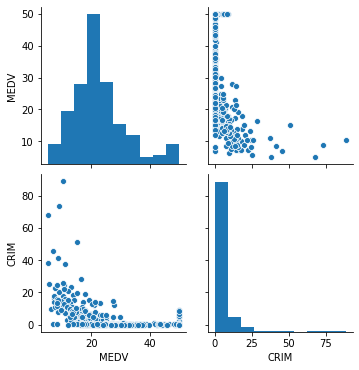

In [15]:
get_pairplot(data[['MEDV','CRIM']])

In [16]:
get_score(data.dropna()[['CRIM']], data.dropna()['MEDV'])
# оставляем - смотрим наличие выбросов

0.1381400841713265

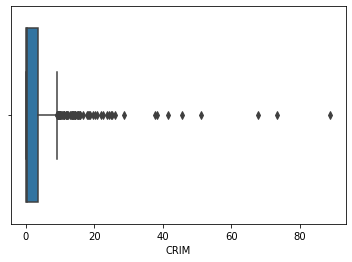

In [17]:
get_boxplot(data,['CRIM'])

In [18]:
#смотрим выбросы более 60
data[data['CRIM'] > 60]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


In [19]:
#удаляем из датасета - это значительные выбросы и низкий MEDV, и смотрим скор
data = data[data['CRIM'] < 60]
get_score(data[cols], data['MEDV'])

0.7579405335724028

In [20]:
# - start_score                *** 0.711226005748496
# - CRIM <60 score             *** 0.7579405335724028

In [21]:
get_score(data.dropna()[['CHAS']], data.dropna()['MEDV'])
# очень слабая прогоностическая сила переменной CHAS

0.0037683618261178387

In [22]:
#смотрим что за значения в CHAS
data['CHAS'].value_counts()

0    468
1     35
Name: CHAS, dtype: int64

In [23]:
# судя по всему, в данной переменной 0 мог быть присвоен и при отсутствии значений - пока столбец полностью удалять не буду
# потом в нему вернусь

In [24]:
# - start_score                 *** 0.711226005748496
# - CRIM without blowouts score *** 0.7579405335724028

In [25]:
data['RM'].value_counts()

6.417    3
6.405    3
6.167    3
6.127    3
6.229    3
        ..
6.232    1
6.593    1
6.425    1
5.950    1
6.625    1
Name: RM, Length: 444, dtype: int64

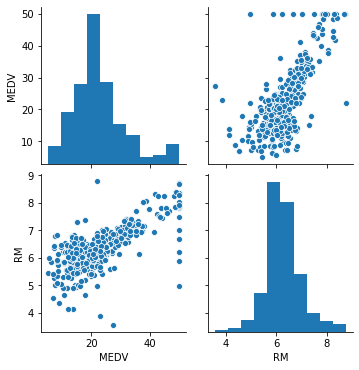

In [26]:
get_pairplot(data[['MEDV','RM']])

In [27]:
get_score(data.dropna()[['RM']], data.dropna()['MEDV'])

0.6190262791740279

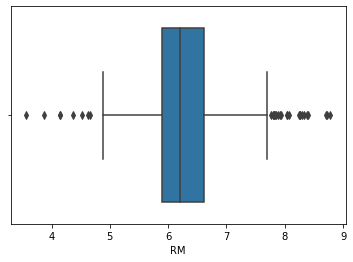

In [28]:
get_boxplot(data,['RM'])

In [29]:
data[data['RM'] < 4.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
365,4.55587,0.0,18.1,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
406,20.71620,0.0,18.1,0,0.659,4.138,100.0,1.1781,24,666,20.2,370.22,23.34,11.9


In [30]:
data2 = data[data['RM'] > 4]
get_score(data2[cols], data2['MEDV'])

0.8280021901730786

In [31]:
# скор вырос - используем

In [32]:
data[data['RM'] > 8.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
364,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9


In [33]:
data3 = data2[data2['RM'] < 8.75]
get_score(data3[cols], data3['MEDV'])

0.7961756098707485

In [34]:
# скор упал - не используем, убираем только выбросы снизу

In [35]:
data = data[data['RM'] > 4]
get_score(data[cols], data['MEDV'])

0.8280021901730786

In [36]:
# - start_score                 *** 0.711226005748496
# - CRIM <60 score              *** 0.7579405335724028
# - RM > 4 score                *** 0.8280021901730786

In [37]:
#смотрим что за значения в RAD
data['RAD'].value_counts()

24    127
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [38]:
# это категориальная переменная, пробуем перевести ее через one-hot-encoding
data2 = get_one_hot(data, ['RAD'])

In [39]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,36.2,0,0,1,0,0,0,0,0,0


In [40]:
get_score(data2[cols], data2['MEDV'])

0.8280021901730786

In [41]:
#удалим RAD
data2 = data2.drop(columns=['RAD'])

In [42]:
data2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4',
       'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24'],
      dtype='object')

In [43]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4',
       'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']

In [44]:
get_score(data2[cols], data2['MEDV'])

0.8212522823506787

In [45]:
# - start_score                              *** 0.711226005748496
# - CRIM <60 score                           *** 0.7579405335724028
# - RM > 4 score                             *** 0.8280021901730786
# - only 'RAD_3', 'RAD_5', 'RAD_24','RAD_7'  *** 0.8292052535258043

In [46]:
#убираем столбцы (фичи), снижающие скор
data = data2[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3','RAD_4',
       'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24','MEDV']]
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3','RAD_4',
       'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']
data2 = data[cols]
start_score = get_score(data[cols], data['MEDV'])
start_score

0.8212522823506787

In [48]:
score_ = start_score
del_cols = []
for col in cols:
    cols.remove(col)
    if get_score(data2[cols], data['MEDV']) > score_:
        score_ = get_score(data2[cols], data['MEDV'])
        del_cols.append(col)
    else: cols.append(col)
print(cols)        
print(get_score(data2[cols], data['MEDV']))
print(del_cols)

['ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'RAD_2', 'RAD_4', 'RAD_6', 'RAD_8', 'AGE', 'B', 'RAD_5', 'RAD_24', 'RAD_3', 'TAX', 'RAD_7']
0.832720406717588
['CRIM', 'INDUS', 'NOX', 'RAD_1']


In [ ]:
# - start_score                                   *** 0.711226005748496
# - CRIM <60 score                                *** 0.7579405335724028
# - RM > 4 score                                  *** 0.8280021901730786
# - drop columns 'CRIM', 'INDUS', 'NOX', 'RAD_1'  *** 0.832720406717588

In [50]:
get_score(data[cols], data['MEDV'])

0.832720406717588

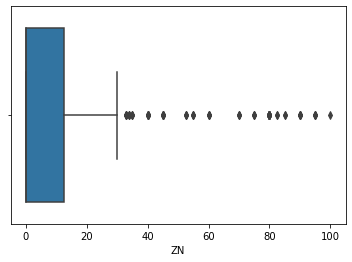

In [55]:
get_boxplot(data,['ZN'])

In [97]:
start_score = get_score(data[cols], data['MEDV'])
final_i = 1
for i in range(1,101):
    data2 = data[data['ZN'] < i]
    if get_score(data2[cols], data2['MEDV']) > start_score:
        start_score = get_score(data2[cols], data2['MEDV'])
        final_i = i
print(start_score, final_i)

0.832720406717588 1


In [104]:
data['MEDV'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
20.6     6
        ..
9.6      1
36.1     1
12.8     1
31.1     1
12.0     1
Name: MEDV, Length: 229, dtype: int64

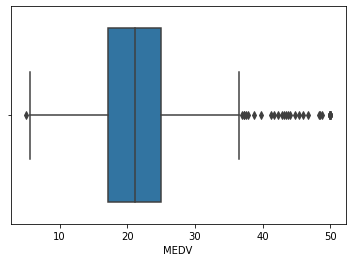

In [113]:
get_boxplot(data,['MEDV'])

In [119]:
# 0.832720406717588
data2 = data[data['MEDV'] != 50.0]
get_score(data2[cols], data2['MEDV'])

0.8069446322342226

In [112]:
# скор при повторном поиске выбросов по переменным не снижается, при исключении строк с низким и высоким MEDV - тоже

In [120]:
# - start_score                                   *** 0.711226005748496
# - CRIM <60 score                                *** 0.7579405335724028
# - RM > 4 score                                  *** 0.8280021901730786
# - drop columns 'CRIM', 'INDUS', 'NOX', 'RAD_1'  *** 0.832720406717588 FINAL SCORE

In [121]:
get_score(data[cols], data['MEDV'])

0.832720406717588

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [123]:
poly = PolynomialFeatures(2)

In [124]:
X_p = poly.fit_transform(data[cols])

In [131]:
names = poly.get_feature_names()

In [126]:
y = data['MEDV']
reg = LinearRegression().fit(X_p,y)

In [136]:
coefs = pd.DataFrame(reg.coef_)

In [138]:
coefs['names'] = names

In [144]:
coefs.sort_values([0], ascending=[False]).head(15)

,0,names
0,1.076165e+08,1
2,9.068634e+01,x1
35,9.068634e+01,x1^2
47,7.599060e+01,x1 x13
41,2.023539e+01,x1 x7
3,1.377267e+01,x2
48,1.288483e+01,x1 x14
43,8.914627e+00,x1 x9
9,8.442966e+00,x8
126,8.442966e+00,x8^2


In [145]:
#Возьмем первые 4 по значимости новые фичи x1^2, x1*x13, x1*x7, x1*x14
# - это 'CHAS'^2, 'CHAS'*'RAD_24','CHAS'*'RAD_4', 'CHAS'*'RAD_3'

In [158]:
data_final = data[cols]
data_final['CHAS^2'] = data_final['CHAS']*data_final['CHAS']
data_final['CHAS_RAD24'] = data_final['CHAS']*data_final['RAD_24']
data_final['CHAS_RAD4'] = data_final['CHAS']*data_final['RAD_4']
data_final['CHAS_RAD3'] = data_final['CHAS']*data_final['RAD_3']

<ipython-input-158-101168133acd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['CHAS_RAD4'] = data_final['CHAS']*data_final['RAD_4']
<ipython-input-158-101168133acd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['CHAS_RAD3'] = data_final['CHAS']*data_final['RAD_3']


In [162]:
cols = ['ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'RAD_2', 'RAD_4',
       'RAD_6', 'RAD_8', 'AGE', 'B', 'RAD_5', 'RAD_24', 'RAD_3', 'TAX',
       'RAD_7', 'CHAS^2', 'CHAS_RAD24', 'CHAS_RAD4', 'CHAS_RAD3']

In [163]:
get_score(data_final[cols], data['MEDV'])

0.8345216277487785

In [155]:
# чуть добавили в скор за счет новых переменных

# - start_score                                                           *** 0.711226005748496
# - CRIM <60 score                                                        *** 0.7579405335724028
# - RM > 4 score                                                          *** 0.8280021901730786
# - drop columns 'CRIM', 'INDUS', 'NOX', 'RAD_1'                          *** 0.832720406717588 
# - append new columns 'CHAS^2', 'CHAS_RAD24', 'CHAS_RAD4', 'CHAS_RAD3'   *** 0.8345216277487785 FINAL SCORE

,ZN,CHAS,RM,DIS,PTRATIO,LSTAT,RAD_2,RAD_4,RAD_6,RAD_8,AGE,B,RAD_5,RAD_24,RAD_3,TAX,RAD_7,CHAS^2
0,18.0,0,6.575,4.0900,15.3,4.98,0,0,0,0,65.2,396.90,0,0,0,296,0,0
1,0.0,0,6.421,4.9671,17.8,9.14,1,0,0,0,78.9,396.90,0,0,0,242,0,0
2,0.0,0,7.185,4.9671,17.8,4.03,1,0,0,0,61.1,392.83,0,0,0,242,0,0
3,0.0,0,6.998,6.0622,18.7,2.94,0,0,0,0,45.8,394.63,0,0,1,222,0,0
4,0.0,0,7.147,6.0622,18.7,5.33,0,0,0,0,54.2,396.90,0,0,1,222,0,0
